<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 - Sentiment Analysis Model (Problem 1)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [20]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.3.0-tf


### GitHub + Colab

In [1]:
#run for GitHub Colab
!git clone "https://github.com/OldManSteve/DL_Assg2.git"


Cloning into 'DL_Assg2'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 31 (delta 5), reused 30 (delta 4), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [2]:
#GitHub Colab directory
# Directories for files
map_file = '/content/DL_Assg2/mapping.csv'
dataset_file = '/content/DL_Assg2/dataset.csv'

In [6]:
#Google drive model upload/save storage
from google.colab import drive
drive.mount('/content/drive')

model_path='/content/drive/My Drive/Colab Notebooks/DL_Assg2_Models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [41]:
# Load the emoji_dictionary
import pandas as pd
df = pd.read_csv(map_file, delimiter=',')
emoji_dictionary = df.loc[:,'emoticons'].to_dict()
print(emoji_dictionary)
print('A total of: ', len(emoji_dictionary), 'Emoji Icons')

{0: '😍', 1: '😂', 2: '📷', 3: '🔥', 4: '❤'}
A total of:  5 Emoji Icons


In [56]:
# load the dataset
dat = pd.read_csv(dataset_file, delimiter=',')
texts = dat.loc[:,'TEXT'].values 
labels = dat.loc[:,'Label'].values

dat.head()

,TEXT,Label
0,Been friends since 7th grade. Look at us now w...,0
1,This is what it looks like when someone loves ...,1
2,RT @user this white family was invited to a Bl...,1
3,"Westenders @user #LAZzNation @ Weston, Toronto\n",2
4,Maxwell heads home @ Summa Akron City Hospital\n,0


In [57]:
# Check the maximum length of texts
max_len = -1
for example in texts:
    if len(example.split()) > max_len:
        max_len = len(example.split())
        
print('the maximum length of the text inputs is ', max_len)

the maximum length of the text inputs is  34


### 1.2 Data Processing


In [58]:
# Convert the texts and labels into numeric tensors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_words = 10000  

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=maxlen)

y = np.asarray(labels)
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)

#Shuffle
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

Found 54076 unique tokens.
Shape of data tensor: (42546, 20)
Shape of label tensor: (42546,)


### 1.3 Data Sampling

In [72]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)
# Refer the report Appendix
# Please enter the random_state assigned to your group

## Step 2 – Develop a Sentiment Analysis Model

In [71]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #1 (Replicate as necessary for other models)

In [73]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=maxlen))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 20, 64)            18688     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 133,957
Trainable params: 133,957
Non-trainable params: 0
__________________________________________________

In [74]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 92s 7ms/step - loss: 1.2859 - acc: 0.4421 - val_loss: 1.1656 - val_acc: 0.4764
Epoch 2/10
13614/13614 [==============================] - 91s 7ms/step - loss: 1.1588 - acc: 0.4867 - val_loss: 1.1321 - val_acc: 0.4960
Epoch 3/10
13614/13614 [==============================] - 91s 7ms/step - loss: 1.1270 - acc: 0.5072 - val_loss: 1.1131 - val_acc: 0.5113
Epoch 4/10
13614/13614 [==============================] - 91s 7ms/step - loss: 1.1061 - acc: 0.5245 - val_loss: 1.1140 - val_acc: 0.5166
Epoch 5/10
13614/13614 [==============================] - 91s 7ms/step - loss: 1.0911 - acc: 0.5312 - val_loss: 1.1026 - val_acc: 0.5281
Epoch 6/10
13614/13614 [==============================] - 89s 7ms/step - loss: 1.0802 - acc: 0.5392 - val_loss: 1.0947 - val_acc: 0.5330
Epoch 7/10
13614/13614 [==============================] - 90s 7ms/step - loss: 1.0689 - acc: 0.5479 - val_loss: 1.1393 - val_acc: 0.5195
Epoch 8/10
13614/13614 [=================

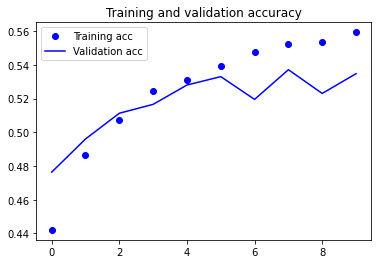

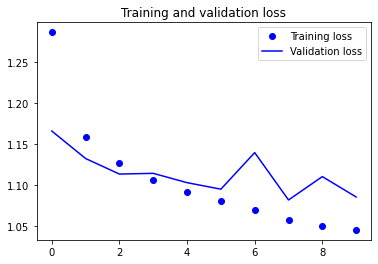

In [75]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('text_model_1.h5')

## Step 3 – Evaluate the Model using Testing Data 

In [ ]:
# Model #1 (replicate where necessary for other models)
model.load_weights('text_model_1.h5')


In [ ]:
# Save the Best Model
model.save('text_model_best.h5')

## Step 4 – Use the Best Model to make prediction

In [ ]:
model.load_weights('text_model_best.h5')

In [ ]:
# takes the user input
text_input = np.array([input()])

In [ ]:
# convert the user input into numeric tensor


In [ ]:
# show the model output using predict function
